In [40]:
import psana
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [59]:
def get_ave_int_and_shot_energy(run_num):
    f = h5py.File('/reg/d/psdm/cxi/cxilr6716/results/epics_smdata_h5_files/aveInt_run%d_0.h5'%run_num,'r')
    x = np.nan_to_num((f['gas_detector']['f_21_ENRC'].value +f['gas_detector']['f_22_ENRC'].value)*0.5)
    
    y=f['ave_ints'].value 
    y=y[x>0]
    x=x[x>0]
    
    f.close()
    
    return x, y

In [95]:

e18,int18 = get_ave_int_and_shot_energy(18)
e100,int100 = get_ave_int_and_shot_energy(100)
e90,int90 = get_ave_int_and_shot_energy(90)
e133,int133 = get_ave_int_and_shot_energy(133)

trans90 = int90/e90

trans18 = int18/e18
trans133 = int133/e133
trans100 = int100/e100

In [96]:
np.sum(np.isnan(e133))

0

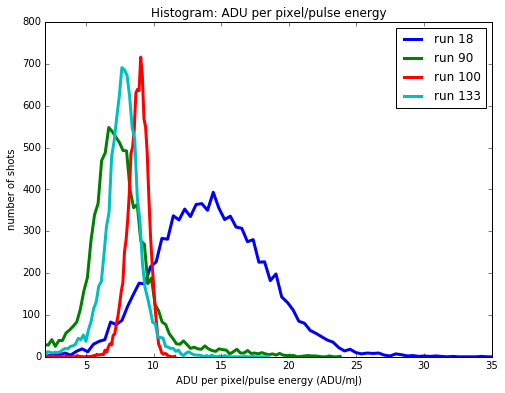

In [103]:
plt.figure(figsize=[8,6])
bins=np.histogram(trans18, bins=100)
plt.plot(bins[1][1:], bins[0],  label='run 18', linewidth=3)

bins=np.histogram(trans90, bins=100)
plt.plot(bins[1][1:], bins[0],  label='run 90', linewidth=3)

bins=np.histogram(trans100, bins=100)
plt.plot(bins[1][1:], bins[0],  label='run 100', linewidth=3)

bins=np.histogram(trans133, bins=100)
plt.plot(bins[1][1:], bins[0],  label='run 133', linewidth=3)
plt.xlim(2,35)

plt.legend()

plt.ylabel('number of shots')
plt.xlabel('ADU per pixel/pulse energy (ADU/mJ)')

plt.title('Histogram: ADU per pixel/pulse energy')
# plt.savefig('hist_adu_per_pix_pulse_en.png')

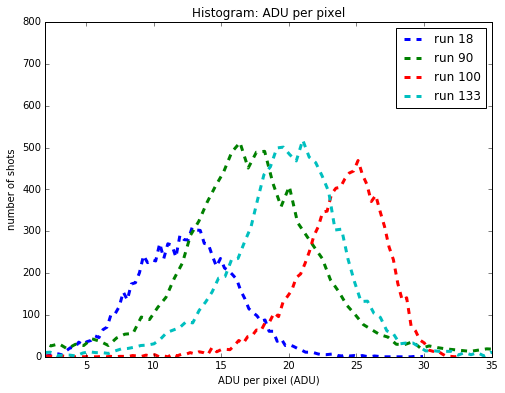

In [102]:
plt.figure(figsize=[8,6])
bins=np.histogram(int18, bins=100)
plt.plot(bins[1][1:], bins[0], '--', label='run 18', linewidth=3)

bins=np.histogram(int90, bins=100)
plt.plot(bins[1][1:], bins[0],  '--',label='run 90', linewidth=3)

bins=np.histogram(int100, bins=100)
plt.plot(bins[1][1:], bins[0], '--', label='run 100', linewidth=3)

bins=np.histogram(int133, bins=100)
plt.plot(bins[1][1:], bins[0], '--', label='run 133', linewidth=3)
plt.xlim(2,35)

plt.legend()

plt.ylabel('number of shots')
plt.xlabel('ADU per pixel (ADU)')

plt.title('Histogram: ADU per pixel')
# plt.savefig('hist_adu_per_pix.png')

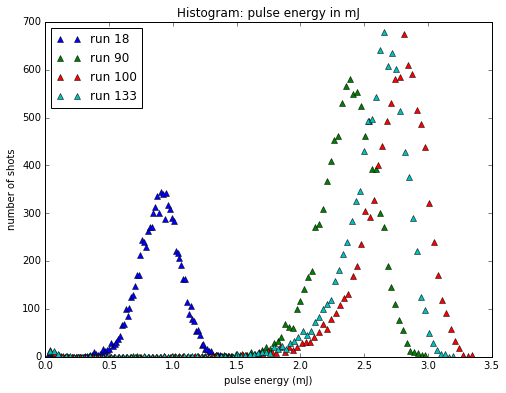

In [101]:
plt.figure(figsize=[8,6])
bins=np.histogram(e18, bins=100)
plt.plot(bins[1][1:], bins[0], '^', label='run 18', linewidth=3)

bins=np.histogram(e90, bins=100)
plt.plot(bins[1][1:], bins[0],  '^',label='run 90', linewidth=3)

bins=np.histogram(e100, bins=100)
plt.plot(bins[1][1:], bins[0], '^', label='run 100', linewidth=3)

bins=np.histogram(e133, bins=100)
plt.plot(bins[1][1:], bins[0], '^', label='run 133', linewidth=3)
plt.xlim(0,3.5)

plt.legend(loc='upper left')

plt.ylabel('number of shots')
plt.xlabel('pulse energy (mJ)')
plt.title('Histogram: pulse energy in mJ')
# plt.savefig('hist_pulse_en_in_mj.png')

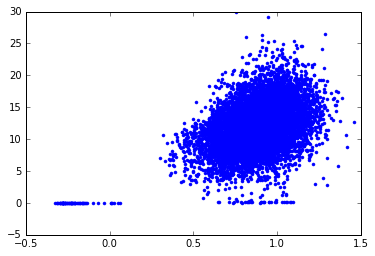

In [100]:
x = (f['gas_detector']['f_21_ENRC'].value +f['gas_detector']['f_22_ENRC'].value)*0.5

plt.plot(x,f['ave_ints'].value,'.')
# _=plt.hist(f2['ave_ints'].value)

In [34]:
run_num=18
ds = psana.DataSource('exp=cxilr6716:run=%d:smd'%run_num)
det = psana.Detector('FEEGasDetEnergy')
evt = ds.events().next()
fee_gas = det.get(evt)
 
# there are two independent measurements of the pulse energy so take the
# average of the two
 
pulse_energy = 0.5*(fee_gas.f_21_ENRC() + fee_gas.f_22_ENRC())
print pulse_energy

0.927377289623


In [37]:
cspad = psana.Detector('CxiDs2.0:Cspad.0')
evt = ds.events().next()

In [38]:
img = cspad.image(evt)
img.mean()
# print img

10.054027

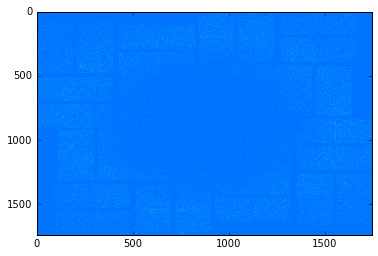

In [39]:
plt.imshow(img,aspect='auto')

In [31]:
img.mean()

10.054027